In [111]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Flatten

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error

from sklearn.decomposition import PCA
%matplotlib inline

In [81]:
features = pd.read_csv('dengue_features_train.csv')
target = pd.read_csv('dengue_labels_train.csv')
df = pd.merge(features, target, on=['city','year','weekofyear'])

In [82]:
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [83]:
len(df) - len(df[df['city'] == 'iq'])

936

In [84]:
# I will check sj and iq boardline first.

In [85]:
df.iloc[930:940, :]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
930,sj,2008,12,2008-03-18,0.044900,0.024450,0.101629,0.088000,0.00,297.404286,297.435714,292.205714,299.8,294.9,0.90,72.915714,0.00,13.737143,3.871429,25.200000,7.042857,30.0,20.6,0.5,3
931,sj,2008,13,2008-03-25,0.077850,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,299.7,294.4,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4
932,sj,2008,14,2008-04-01,-0.038000,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,299.8,296.5,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3
933,sj,2008,15,2008-04-08,-0.155200,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,299.4,295.8,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1
934,sj,2008,16,2008-04-15,0.001800,NaN,0.203900,0.209843,0.00,297.630000,297.778571,292.274286,299.7,295.9,4.82,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2,3
935,sj,2008,17,2008-04-22,-0.037000,-0.010367,0.077314,0.090586,0.00,298.672857,298.692857,294.280000,300.9,295.9,2.17,76.960000,0.00,15.671429,3.957143,27.042857,7.514286,31.7,23.3,0.3,5
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,304.5,292.6,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0


In [86]:
 # The reason that checked the border line of two cities is I want to fill missing values using interpolate
    
df = df.interpolate()

In [87]:
df.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [88]:
X = df.drop('total_cases', axis=1)
y = df['total_cases']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.33, random_state=20)

In [90]:
X_train.shape, X_test.shape

((975, 24), (481, 24))

In [91]:
df_train = pd.concat([X_train, y_train], axis=1) 

df_test = pd.concat([X_test, y_test], axis=1)

df_train['week_start_date'] = pd.to_datetime(df_train['week_start_date'])
df_test['week_start_date'] = pd.to_datetime(df_test['week_start_date'])


df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 1141 to 1379
Data columns (total 25 columns):
city                                     975 non-null object
year                                     975 non-null int64
weekofyear                               975 non-null int64
week_start_date                          975 non-null datetime64[ns]
ndvi_ne                                  975 non-null float64
ndvi_nw                                  975 non-null float64
ndvi_se                                  975 non-null float64
ndvi_sw                                  975 non-null float64
precipitation_amt_mm                     975 non-null float64
reanalysis_air_temp_k                    975 non-null float64
reanalysis_avg_temp_k                    975 non-null float64
reanalysis_dew_point_temp_k              975 non-null float64
reanalysis_max_air_temp_k                975 non-null float64
reanalysis_min_air_temp_k                975 non-null float64
reanalysis_precip_amt

In [92]:
df_train = pd.concat([df_train.drop("city", axis=1),pd.get_dummies(df_train['city'])],axis=1)
df_test = pd.concat([df_test.drop("city", axis=1),pd.get_dummies(df_test['city'])],axis=1) 

In [93]:
# re-assign X_train, test and y_train, test after missing value treatment
X_train = df_train.drop(df_train[['total_cases','week_start_date']], axis=1)
y_train = df_train['total_cases']

X_test = df_test.drop(df_test[['total_cases','week_start_date']], axis=1)
y_test = df_test['total_cases']

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(975, 24) (481, 24) (975,) (481,)


In [94]:
y_train= y_train.values
y_test = y_test.values

In [95]:
ss= StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

In [101]:
model = Sequential()



model.add(Dense(24, input_dim=24, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))


model.compile(loss='mean_absolute_error', optimizer='adam')

model.fit(Xs_train, y_train, validation_data=(Xs_test, y_test), epochs=120)

Train on 975 samples, validate on 481 samples
Epoch 1/120
975/975 [==============================] - 0s 14us/step - loss: 24.9896 - val_loss: 22.4721
Epoch 2/120
975/975 [==============================] - 0s 16us/step - loss: 24.0445 - val_loss: 21.2208
Epoch 3/120
975/975 [==============================] - 0s 15us/step - loss: 22.6156 - val_loss: 19.4481
Epoch 4/120
975/975 [==============================] - 0s 21us/step - loss: 20.5876 - val_loss: 17.4487
Epoch 5/120
975/975 [==============================] - 0s 19us/step - loss: 18.9454 - val_loss: 16.5573
Epoch 6/120
975/975 [==============================] - 0s 20us/step - loss: 18.2984 - val_loss: 16.1960
Epoch 7/120
975/975 [==============================] - 0s 22us/step - loss: 18.0117 - val_loss: 15.9639
Epoch 8/120
975/975 [==============================] - 0s 20us/step - loss: 17.8471 - val_loss: 15.8049
Epoch 9/120
975/975 [==============================] - 0s 19us/step - loss: 17.6868 - val_loss: 15.7361
Epoch 10/120
975/9

975/975 [==============================] - 0s 20us/step - loss: 15.1610 - val_loss: 14.5340
Epoch 79/120
975/975 [==============================] - 0s 18us/step - loss: 15.1374 - val_loss: 14.4559
Epoch 80/120
975/975 [==============================] - 0s 19us/step - loss: 15.1232 - val_loss: 14.4148
Epoch 81/120
975/975 [==============================] - 0s 18us/step - loss: 15.1002 - val_loss: 14.5554
Epoch 82/120
975/975 [==============================] - 0s 18us/step - loss: 15.1021 - val_loss: 14.4361
Epoch 83/120
975/975 [==============================] - 0s 21us/step - loss: 15.0480 - val_loss: 14.4372
Epoch 84/120
975/975 [==============================] - 0s 19us/step - loss: 15.0293 - val_loss: 14.4933
Epoch 85/120
975/975 [==============================] - 0s 21us/step - loss: 15.0192 - val_loss: 14.4382
Epoch 86/120
975/975 [==============================] - 0s 21us/step - loss: 15.0406 - val_loss: 14.4870
Epoch 87/120
975/975 [==============================] - 0s 18us/step

In [20]:
y_pred = model.predict(Xs_test)

y_pred

array([[ 13.35019875],
       [ 10.30833054],
       [ 11.67101383],
       [  1.37324858],
       [ 19.80879784],
       [ 52.66710663],
       [ 20.92783737],
       [ 33.66841888],
       [ 15.5451088 ],
       [  9.93733978],
       [ 17.88076973],
       [  5.50292587],
       [ 15.38540649],
       [  6.28948689],
       [  0.96598297],
       [ 35.58348083],
       [  0.75474006],
       [ 36.53339386],
       [  7.10054398],
       [ 21.62678337],
       [ 15.30698967],
       [ 20.822258  ],
       [  5.25020599],
       [  6.26235247],
       [ 46.14894867],
       [  3.42609406],
       [ 37.01808167],
       [ 17.02692223],
       [  9.22744942],
       [  3.96792555],
       [ 43.37912369],
       [ 34.6515007 ],
       [ 17.32435417],
       [ 52.93011475],
       [  3.26203156],
       [ 30.27310562],
       [ 20.95853996],
       [ 16.89899635],
       [ 24.16309929],
       [ 25.12834358],
       [  2.68453503],
       [ 13.22915268],
       [  2.77515221],
       [ -1

In [25]:
y_test.max()

359

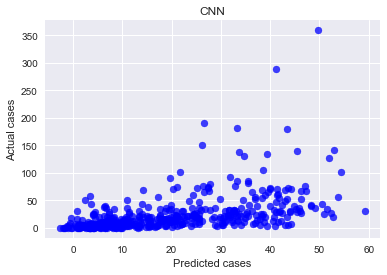

In [23]:

plt.scatter(y_pred,y_test, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted cases')
plt.ylabel('Actual cases')
plt.title('CNN')
plt.show()

In [49]:
test = pd.read_csv("dengue_features_test.csv")

In [50]:
submission= pd.DataFrame()
submission['city'] = test.city
submission['year'] = test.year
submission['weekofyear']=test.weekofyear

In [51]:
features = list(test._get_numeric_data())
for feature in features:
    test[feature] = test.groupby('city')[feature].transform(lambda x:x.fillna(x.mean()))

In [52]:
test = pd.concat([test.drop("city", axis=1),pd.get_dummies(test['city'])],axis=1)  

test = test.drop('week_start_date',axis=1)

test_s = ss.transform(test)

In [53]:
submission['total_cases'] = model.predict(test_s).round()

submission.total_cases = submission.total_cases.astype(int)

In [54]:
submission.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,4
1,sj,2008,19,2
2,sj,2008,20,6
3,sj,2008,21,9
4,sj,2008,22,7


In [55]:
submission.to_csv('submission_second_with_cnn.csv', index=False)

In [56]:
# This is score, 29.9087

# LSTM RNN Method

In [ ]:
iq_df =df[df['city']=='iq'] 

iq_df = iq_df[['week_start_date','total_cases']]

iq_df.set_index('week_start_date', inplace=True)


iq_df.sort_index(ascending=True, inplace=True)
iq_df.head()


In [ ]:
sj_df =df[df['city']=='sj'] 

sj_df = sj_df[['week_start_date','total_cases']]

sj_df.set_index('week_start_date', inplace=True)


sj_df.sort_index(ascending=True, inplace=True)
sj_df.head()

In [120]:
iq_df =df[df['city']=='iq'] 

iq_df = iq_df[['week_start_date','total_cases']]

iq_df.set_index('week_start_date', inplace=True)


iq_df.sort_index(ascending=True, inplace=True)
iq_df.head()

,total_cases
week_start_date,
2000-07-01,0
2000-07-08,0
2000-07-15,0
2000-07-22,0
2000-07-29,0


In [121]:
iq_X = iq_df[['total_cases']].shift(1)[1:]
iq_y = iq_df['total_cases'].values[1:]

In [122]:
iq_y

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
         0,   1,   1,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   1,   0,   0,   0,   0,   1,   1,   0,   0,   1,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   1,   1,   2,   4,   1,   4,
        11,  16,  23,  12,  14,  18,   8,   7,  10,   7,  10,   5,  11,
         8,  18,  13,   9,  22,  10,   5,  13,   2,  11,  11,   3,   7,
         7,   4,   5,   6,   7,   7,   4,   9,  17,   8,  22,  18,  21,
        16,  31,  25,  28,  26,  18,  27,  11,  38,  29,  21,  11,  10,
         5,   6,   2,   1,   2,   2,   3,   5,   1,   4,   2,   4,   0,
         0,   0,   0,   1,   1,   1,   1,   1,   2,   3,   4,   6,   2,
         2,   5,   1,   1,   0,   0,   0,   0,   2,   0,   3,   0,   0,
         0,   2,   2,   3,   3,   3,   1,   2,   3,   6,   5,   

In [123]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

iq_X_t = mm.fit_transform(iq_X)

iq_y_t = mm.transform([iq_y])[0]

In [124]:
iq_train_size = int(len(iq_X_t) * .67)
iq_train_size

347

In [125]:
iq_X_train = iq_X_t[:iq_train_size, :]
iq_X_train = iq_X_train.reshape(iq_X_train.shape[0], 1, iq_X_train.shape[1])
iq_y_train = iq_y_t[:iq_train_size]

iq_X_test = iq_X_t[iq_train_size:, :]
iq_X_test = iq_X_test.reshape(iq_X_test.shape[0], 1, iq_X_test.shape[1])
iq_y_test = iq_y_t[iq_train_size:]

In [126]:
iq_X_train

array([[[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.00862069]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.00862069]],

       [[ 0.00862069]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.00862069]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],



In [129]:
iq_model = Sequential()
iq_model.add(LSTM(2, input_shape=(None,1)))
iq_model.add(Dense(1))
iq_model.compile(loss='mean_absolute_error', optimizer='adam')

iq_model.fit(iq_X_train, iq_y_train, epochs=100, batch_size=1, validation_data=(iq_X_test, iq_y_test))

Train on 347 samples, validate on 172 samples
Epoch 1/100
347/347 [==============================] - 0s 1ms/step - loss: 0.0504 - val_loss: 0.0597
Epoch 2/100
347/347 [==============================] - 0s 1ms/step - loss: 0.0451 - val_loss: 0.0544
Epoch 3/100
347/347 [==============================] - 0s 1ms/step - loss: 0.0416 - val_loss: 0.0506
Epoch 4/100
347/347 [==============================] - 0s 1ms/step - loss: 0.0388 - val_loss: 0.0510
Epoch 5/100
347/347 [==============================] - 0s 1ms/step - loss: 0.0363 - val_loss: 0.0422
Epoch 6/100
347/347 [==============================] - 0s 1ms/step - loss: 0.0346 - val_loss: 0.0397
Epoch 7/100
347/347 [==============================] - 0s 1ms/step - loss: 0.0333 - val_loss: 0.0383
Epoch 8/100
347/347 [==============================] - 0s 1ms/step - loss: 0.0323 - val_loss: 0.0365
Epoch 9/100
347/347 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0356
Epoch 10/100
347/347 [=======================

Epoch 81/100
347/347 [==============================] - 0s 1ms/step - loss: 0.0307 - val_loss: 0.0349
Epoch 82/100
347/347 [==============================] - 0s 1ms/step - loss: 0.0303 - val_loss: 0.0354
Epoch 83/100
347/347 [==============================] - 0s 1ms/step - loss: 0.0305 - val_loss: 0.0350
Epoch 84/100
347/347 [==============================] - 0s 1ms/step - loss: 0.0302 - val_loss: 0.0351
Epoch 85/100
347/347 [==============================] - 0s 1ms/step - loss: 0.0303 - val_loss: 0.0350
Epoch 86/100
347/347 [==============================] - 0s 1ms/step - loss: 0.0303 - val_loss: 0.0358
Epoch 87/100
347/347 [==============================] - 0s 1ms/step - loss: 0.0304 - val_loss: 0.0357
Epoch 88/100
347/347 [==============================] - 0s 1ms/step - loss: 0.0304 - val_loss: 0.0365
Epoch 89/100
347/347 [==============================] - 0s 1ms/step - loss: 0.0302 - val_loss: 0.0357
Epoch 90/100
347/347 [==============================] - 0s 1ms/step - loss: 0.0305

In [130]:
iq_pred = iq_model.predict(iq_X_test)
iq_pred_t = mm.inverse_transform(iq_pred)


iq_pred_t=iq_pred_t.round()



print(mean_absolute_error(iq_pred_t, iq_y[iq_train_size:]))

In [141]:
sj_df =df[df['city']=='sj'] 

sj_df = sj_df[['week_start_date','total_cases']]

sj_df.set_index('week_start_date', inplace=True)


sj_df.sort_index(ascending=True, inplace=True)
sj_df.head()

,total_cases
week_start_date,
1990-04-30,4
1990-05-07,5
1990-05-14,4
1990-05-21,3
1990-05-28,6


In [142]:
sj_X = sj_df[['total_cases']].shift(1)[1:]
sj_y = sj_df['total_cases'].values[1:]

In [143]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

sj_X_t = mm.fit_transform(sj_X)

sj_y_t = mm.transform([sj_y])[0]

In [144]:
sj_train_size = int(len(sj_X) * .67)
sj_train_size

626

In [145]:
sj_X_train = sj_X_t[:sj_train_size, :]
sj_X_train = sj_X_train.reshape(sj_X_train.shape[0], 1, sj_X_train.shape[1])
sj_y_train = sj_y_t[:sj_train_size]

sj_X_test = sj_X_t[sj_train_size:, :]
sj_X_test = sj_X_test.reshape(sj_X_test.shape[0], 1, sj_X_test.shape[1])
sj_y_test = sj_y_t[sj_train_size:]

In [146]:
sj_model = Sequential()
sj_model.add(LSTM(10, input_shape=(None,1)))
sj_model.add(Dense(1))
sj_model.compile(loss='mean_absolute_error', optimizer='adam')

sj_model.fit(sj_X_train, sj_y_train, epochs=100, batch_size=1, validation_data=(sj_X_test, sj_y_test))

Train on 626 samples, validate on 309 samples
Epoch 1/100
626/626 [==============================] - 1s 1ms/step - loss: 0.0479 - val_loss: 0.0236
Epoch 2/100
626/626 [==============================] - 1s 1ms/step - loss: 0.0232 - val_loss: 0.0121
Epoch 3/100
626/626 [==============================] - 1s 1ms/step - loss: 0.0205 - val_loss: 0.0122
Epoch 4/100
626/626 [==============================] - 1s 1ms/step - loss: 0.0205 - val_loss: 0.0123
Epoch 5/100
626/626 [==============================] - 1s 1ms/step - loss: 0.0201 - val_loss: 0.0128
Epoch 6/100
626/626 [==============================] - 1s 1ms/step - loss: 0.0205 - val_loss: 0.0126
Epoch 7/100
626/626 [==============================] - 1s 1ms/step - loss: 0.0203 - val_loss: 0.0122
Epoch 8/100
626/626 [==============================] - 1s 1ms/step - loss: 0.0202 - val_loss: 0.0122
Epoch 9/100
626/626 [==============================] - 1s 1ms/step - loss: 0.0204 - val_loss: 0.0125
Epoch 10/100
626/626 [=======================

626/626 [==============================] - 1s 1ms/step - loss: 0.0202 - val_loss: 0.0132
Epoch 81/100
626/626 [==============================] - 1s 1ms/step - loss: 0.0203 - val_loss: 0.0130
Epoch 82/100
626/626 [==============================] - 1s 1ms/step - loss: 0.0203 - val_loss: 0.0124
Epoch 83/100
626/626 [==============================] - 1s 1ms/step - loss: 0.0202 - val_loss: 0.0138
Epoch 84/100
626/626 [==============================] - 1s 1ms/step - loss: 0.0205 - val_loss: 0.0143
Epoch 85/100
626/626 [==============================] - 1s 1ms/step - loss: 0.0202 - val_loss: 0.0128
Epoch 86/100
626/626 [==============================] - 1s 1ms/step - loss: 0.0203 - val_loss: 0.0131
Epoch 87/100
626/626 [==============================] - 1s 1ms/step - loss: 0.0203 - val_loss: 0.0128
Epoch 88/100
626/626 [==============================] - 1s 1ms/step - loss: 0.0203 - val_loss: 0.0122
Epoch 89/100
626/626 [==============================] - 1s 1ms/step - loss: 0.0202 - val_loss: 

In [148]:
sj_pred = sj_model.predict(sj_X_test)
sj_pred_t = mm.inverse_transform(sj_pred)


sj_pred_t=sj_pred_t.round()



print(mean_absolute_error(sj_pred_t, sj_y[sj_train_size:]))


5.73462783172


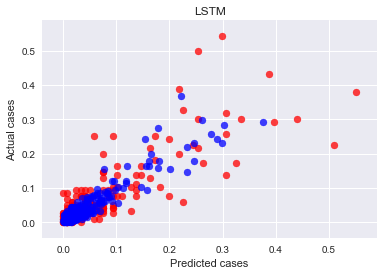

In [70]:
plt.scatter(iq_pred,iq_y_test, alpha=.75,
            color='r')
plt.scatter(sj_pred,sj_y_test, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted cases')
plt.ylabel('Actual cases')
plt.title('LSTM')
plt.show()

In [ ]:
# combine with test data

In [163]:
test = pd.read_csv("dengue_features_test.csv")

In [164]:
submission= pd.DataFrame()
submission['city'] = test.city
submission['year'] = test.year
submission['weekofyear']=test.weekofyear

In [165]:
iq_df =df[df['city']=='iq'] 

iq_df = iq_df[['week_start_date','total_cases']]

iq_df.set_index('week_start_date', inplace=True)


iq_df.sort_index(ascending=True, inplace=True)
len(iq_df)

520

In [166]:
iq_test =test[test['city']=='iq'] 
iq_test = iq_test[['week_start_date']]
iq_test.set_index('week_start_date', inplace=True)

In [167]:
iq_df_new = pd.concat([iq_df, iq_test])

In [168]:
iq_X = iq_df_new[['total_cases']].shift(1)[1:]
iq_y = iq_df_new['total_cases'].values[1:]

In [180]:
mm.fit_transform(iq_X)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [178]:
iq_X_train = iq_X.iloc[:520, :]

iq_y_train = iq_y[:520]

iq_X_test = iq_X.iloc[520:, :]

iq_y_test = iq_y[520:]

In [179]:
iq_X_test

,total_cases
week_start_date,
2010-07-09,NaN
2010-07-16,NaN
2010-07-23,NaN
2010-07-30,NaN
2010-08-06,NaN
2010-08-13,NaN
2010-08-20,NaN
2010-08-27,NaN
2010-09-03,NaN


In [ ]:
iq_X_train = iq_X_train.reshape(iq_X_train.shape[0], 1, iq_X_train.shape[1])
iq_X_test = iq_X_test.reshape(iq_X_test.shape[0], 1, iq_X_test.shape[1])

In [74]:
iq_test

""
week_start_date
2010-07-02
2010-07-09
2010-07-16
2010-07-23
2010-07-30
2010-08-06
2010-08-13
2010-08-20
2010-08-27


In [209]:
def model(x):
    if test['city'] == 'sj':
        return sj_model.predict(x)
    elif test['city'] == 'iq':
        return iq_model.predict(x)

,week_start_date
260,2010-07-02
261,2010-07-09
262,2010-07-16
263,2010-07-23
264,2010-07-30


In [223]:
iq_test.shape

(156, 0)

In [224]:
iq_model.predict(iq_test)

UnboundLocalError: local variable 'arrays' referenced before assignment